In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [27]:
# Modified from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [28]:
url = 'https://raw.githubusercontent.com/marixko/'
file = 'tutorial_classifiers/master/tutorial_data.txt'
df = pd.read_csv(url+file, delim_whitespace=True, low_memory=False)

In [29]:
dim15 = ['FWHM_n', 'A', 'B', 'KrRadDet', 'uJAVA_auto',
       'F378_auto', 'F395_auto', 'F410_auto', 'g_auto', 'F515_auto',
       'r_auto', 'F660_auto', 'i_auto', 'F861_auto', 'z_auto']

dim2 = ['r_auto','FWHM_n']

In [30]:
label = pd.DataFrame(df['class'])

# Transform strings into numbered labels
label.loc[label['class'] == 'STAR', 'class'] = 0
label.loc[label['class'] == 'GALAXY', 'class'] = 1

# Use train_test_split() to sample your training and testing sets
# Let's fix a random_state=42 in order to have the same sets
# on each run. Stratify parameter guarantees that the original
# proportion of the classes is maintained

X_train, X_test, y_train, y_test = train_test_split(df[dim15], label,
                                                    test_size=0.3,
                                                    random_state=42,
                                                   stratify = label)

Confusion matrix, without normalization


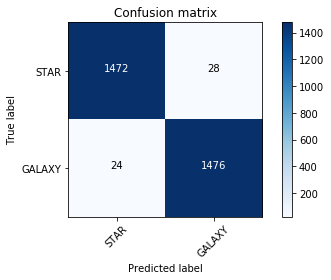

In [31]:
# Train your model:
y_train=y_train.astype('int')
clf2 = SVC(kernel= 'linear')
clf2.fit(X_train[dim2], y_train.values.ravel())

# Make the predictions:
y_pred2 = clf2.predict(X_test[dim2])

# Plot confusion matrix:
matrix = confusion_matrix(y_test['class'].astype("int"), y_pred2)
fig = plot_confusion_matrix(matrix, classes=['STAR','GALAXY'])
plt.show()

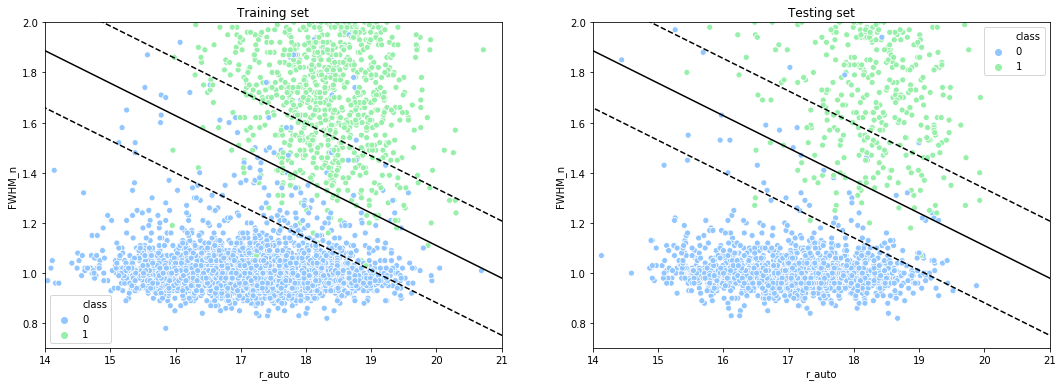

In [42]:
plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0,0])
sns.scatterplot(x=X_train.r_auto, y=X_train.FWHM_n,
                    hue=y_train['class'])

#Calculate margin (from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html)
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 25)
yy = a * xx - (clf2.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf2.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

#Plot margin
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.xlabel('r_auto')
plt.ylabel('FWHM_n')
plt.xlim(14,21)
plt.ylim(0.70, 2)

plt.title('Training set')


ax = plt.subplot(gs[0,1])
sns.scatterplot(x=X_test.r_auto , y=X_test.FWHM_n, hue=y_test['class'])
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.xlim(14,21)
plt.ylim(0.7, 2)
plt.title('Testing set')

plt.show()

Text(0.5, 1.0, 'Support vectors (Training set)')

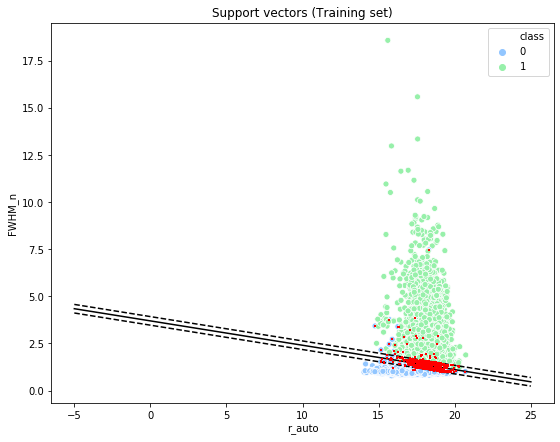

In [43]:
fig = plt.figure(figsize=(9,7))
sns.scatterplot(x=X_train[dim2].r_auto, y=X_train[dim2].FWHM_n,
                    hue=y_train['class'])

plt.scatter(clf2.support_vectors_[:, 0],
clf2.support_vectors_[:, 1], s=8,
zorder=10,color='red', marker='+')

# plt.xlim(0.9,2)
# plt.ylim(0.8,5)
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.title('Support vectors (Training set)')



In [20]:
# Train your model:
clf15 = SVC(kernel= 'linear')
clf15.fit(X_train, y_train.values.ravel())

# Make predictions:
y_pred = clf15.predict(X_test)

# Plot confusion matrix:
matrix = confusion_matrix(y_test['class'], y_pred)
fig = plot_confusion_matrix(matrix, classes=['STAR','GALAXY'])
plt.show()

ValueError: Unknown label type: 'unknown'

In [21]:
print("Accuracy")
print(" First model (dim2):",
      np.round(100*metrics.accuracy_score(y_test, y_pred2),2), '%')
print(" Second model (dim15):",
      np.round(100*metrics.accuracy_score(y_test, y_pred),2), '%')

P2 = metrics.precision_score(y_test, y_pred2, pos_label=1)
P = metrics.precision_score(y_test, y_pred, pos_label=1)

print("Galaxy Precision")
print(" First model (dim2):", np.round(100*P2,2), '%')
print(" Second model (dim15):", np.round(100*P,2), '%')


R2 = metrics.recall_score(y_test, y_pred2, pos_label=1)
R = metrics.recall_score(y_test, y_pred, pos_label=1)


print("Galaxy Recall")
print(" First model (dim2):", np.round(100*R2,2), '%')
print(" Second model (dim15):", np.round(100*R,2), '%')

print("F-measure")
print(" First model  (dim2):", np.round(metrics.f1_score(y_test, y_pred2),3))
print(" Second model  (dim15):", np.round(metrics.f1_score(y_test, y_pred),3))

Accuracy


NameError: name 'y_pred2' is not defined